In [2]:
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Define Matplot Style

In [3]:
# mpl.style.use('seaborn-v0_8')
#mpl.style.use('seaborn-v0_8-bright')
#mpl.style.use('ggplot')

# Model Definition

### Original FP32 Model

In [4]:
model = {
    'conv1' : {
        'in': 3,
        'out': 32,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv2' : {
        'in': 32,
        'out': 16,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv31' : {
        'in': 16,
        'out': 16,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv32' : {
        'in': 16,
        'out': 32,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv33' : {
        'in': 32,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv34' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': False
    },
    'conv41' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv42' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': False
    },
    'conv43' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv44' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': False
    },
    'conv45' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv46' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': False
    },
    'linear51' : {
        'in': 64,
        'out': 16,
        'layer_size': 'small'
    },
    'linear52' : {
        'in': 16,
        'out': 2,
        'layer_size': 'small'
    }
}

### Pruning after SVD HIGH

In [5]:
model_HIGH_cp_after_svd = {
    'conv1' : {
        'in': 3,
        'out': 24,
        'kernel': 3,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv20' : {
        'in': 24,
        'out': 8,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv21' : {
        'in': 8,
        'out': 16,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv31' : {
        'in': 16,
        'out': 16,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv320' : {
        'in': 16,
        'out': 16,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv321' : {
        'in': 16,
        'out': 32,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv33' : {
        'in': 32,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False,
    },
    'conv340' : {
        'in': 32,
        'out': 32,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv341' : {
        'in': 32,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'big',
        'is_bias': False
    },
    'conv41' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv42' : {
        'in': 32,
        'out': 64,
        'kernel': 3,
        'layer_size': 'big',
        'is_bias': True
    },
    'conv43' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': True
    },
    'conv440' : {
        'in': 32,
        'out': 48,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv441' : {
        'in': 48,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'big',
        'is_bias': False
    },
    'conv45' : {
        'in': 64,
        'out': 32,
        'kernel': 1,
        'layer_size': 'small',
        'is_bias': False
    },
    'conv460' : {
        'in': 32,
        'out': 16,
        'kernel': (3, 1),
        'layer_size': 'small',
        'is_bias': False
    },
    'conv461' : {
        'in':16,
        'out': 64,
        'kernel': (1, 3),
        'layer_size': 'small',
        'is_bias': True
    },
    'linear51' : {
        'in': 64,
        'out': 16,
        'layer_size': 'small'
    },
    'linear52' : {
        'in': 16,
        'out': 2,
        'layer_size': 'small'
    }
}

# Print Model

In [6]:
def print_model(model_dic):
    for k in model_dic.keys():
        print(k)
        for kin, v in model_dic[k].items():
            print(f'\t{kin:<15}: ' + str(v).rjust(8))

### Original FP32 model, no SVD, no Pruning

In [7]:
print_model(model)

conv1
	in             :        3
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
conv2
	in             :       32
	out            :       16
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
conv32
	in             :       16
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
conv33
	in             :       32
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
conv34
	in             :       32
	out            :       64
	kernel         :        3
	layer_size     :      big
	is_bias        :    False
conv41
	in             :       64
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
conv42
	

### High SVD and Pruning

In [8]:
print_model(model_HIGH_cp_after_svd)

conv1
	in             :        3
	out            :       24
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
conv20
	in             :       24
	out            :        8
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
conv21
	in             :        8
	out            :       16
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :    False
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
conv320
	in             :       16
	out            :       16
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
conv321
	in             :       16
	out            :       32
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :    False
conv33
	in             :       32
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
conv3

# Functions to Calculate Conv and Linear Size

In [9]:
def conv_size(conv_dic):
    '''
    Calculates number of weights and bias
        - weights = kernel**2 * in * out
        - bias = out
    - return: number of weights, number of bias
    '''
    if isinstance(conv_dic['kernel'], int):
        return (
            (conv_dic['kernel']**2) * conv_dic['in']  * conv_dic['out'], 
            conv_dic['out'] if conv_dic['is_bias'] else 0
        )
    elif isinstance(conv_dic['kernel'], tuple):
        return (
            (conv_dic['kernel'][0]*conv_dic['kernel'][1]) * conv_dic['in']  * conv_dic['out'], 
            conv_dic['out'] if conv_dic['is_bias'] else 0 
        )
    else:
        print("Kernel is not well defined")
        
def linear_size(linear_dic):
    '''
    Calculates number of weights and bias
        - weights = in * out
        - bias = out
    - return: number of weights, number of bias
    '''
    return linear_dic['in'] * linear_dic['out'],  linear_dic['out'] 

# Update Model Dic with Weights and Bias

In [10]:
def add_weights_bias(model):
    for k in model.keys():
        if 'conv' in k:
            weights, bias = conv_size(model[k])
            model[k].update({'weights': weights, 'bias': bias})
        elif 'linear' in k:
            weights, bias = linear_size(model[k])
            model[k].update({'weights': weights, 'bias': bias})
        else:
            print('Wrong layer name')

### FP32 Model

In [11]:
add_weights_bias(model)
print_model(model)

conv1
	in             :        3
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
	weights        :      864
	bias           :        0
conv2
	in             :       32
	out            :       16
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
	weights        :     4608
	bias           :        0
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
	weights        :      256
	bias           :        0
conv32
	in             :       16
	out            :       32
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
	weights        :     4608
	bias           :        0
conv33
	in             :       32
	out            :       32
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
	weights        :     1024
	bias           :        0
conv34
	in            

### MEDIUM SVD and Pruning

In [12]:
add_weights_bias(model_HIGH_cp_after_svd)
print_model(model_HIGH_cp_after_svd)

conv1
	in             :        3
	out            :       24
	kernel         :        3
	layer_size     :    small
	is_bias        :    False
	weights        :      648
	bias           :        0
conv20
	in             :       24
	out            :        8
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
	weights        :      576
	bias           :        0
conv21
	in             :        8
	out            :       16
	kernel         :   (1, 3)
	layer_size     :    small
	is_bias        :    False
	weights        :      384
	bias           :        0
conv31
	in             :       16
	out            :       16
	kernel         :        1
	layer_size     :    small
	is_bias        :    False
	weights        :      256
	bias           :        0
conv320
	in             :       16
	out            :       16
	kernel         :   (3, 1)
	layer_size     :    small
	is_bias        :    False
	weights        :      768
	bias           :        0
conv321
	in         

# Calculate Number of Weights for Small and Big Layers

In [13]:
def small_big_weights_number(model_dic):
    small_weights = 0
    big_weights = 0
    for k in model_dic.keys():
        if model_dic[k]['layer_size'] == 'small':
            small_weights += model_dic[k]['weights'] 
        elif model_dic[k]['layer_size'] == 'big':
            big_weights += model_dic[k]['weights'] 
        else:
            print("Error: layer size is not well defined")

    return small_weights, big_weights

# Pie Comparing Weights Portion of Small and Big Layers

### Before AIMET

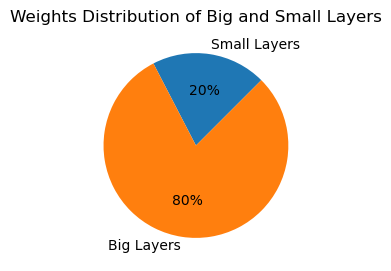

In [14]:
labels = ['Small Layers', 'Big Layers']

small_weights, big_weights = small_big_weights_number(model)

fig, ax = plt.subplots(figsize=(4,3))
ax.pie([small_weights, big_weights], labels = labels, autopct='%.0f%%', startangle=45)
ax.set_title("Weights Distribution of Big and Small Layers")
fig.savefig('models_comparison/weights_percentage.png')

### After High AIMET

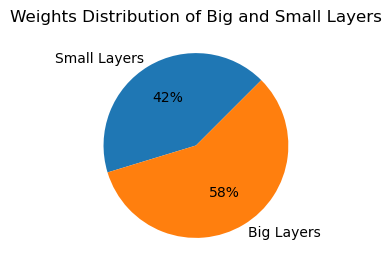

In [15]:
labels = ['Small Layers', 'Big Layers']

small_weights, big_weights = small_big_weights_number(model_HIGH_cp_after_svd)

fig, ax = plt.subplots(figsize=(4,3))
ax.pie([small_weights, big_weights], labels = labels, autopct='%.0f%%', startangle=45)
ax.set_title("Weights Distribution of Big and Small Layers")
fig.savefig('models_comparison/aimet_weights_percentage.png')

# Calculate Size of Each Layer

In [16]:
def add_layer_size(model_dic, small_size, big_size, bias_size):

    model = copy.deepcopy(model_dic)
    for k in model.keys():
        bias_bits = model[k]['bias'] * bias_size
        weights_bits = 0
        if model[k]['layer_size'] == "small":
            weights_bits = model[k]['weights'] * small_size
        elif model[k]['layer_size'] == "big":
            weights_bits = model[k]['weights'] * big_size
        else:
            print('Wrong layer type: small or big')
        
        model[k].update({'weights_bits': weights_bits, 'bias_bits': bias_bits})

    return model

In [17]:
#model1 = add_layer_size(model, wb_small_1, wb_big_1, bias_bits)
#print_model(model1)

# Bits Overview

In [18]:
def get_layers_total_bits(model):
    '''
    Compute total bits summing each layer. It returns separated layers bits too.

    Return:
        - total bits
        - total bits of small layers
        - total bits of big layers
        - total bits of bias
    '''
    
    small_layers_bits = 0
    big_layers_bits = 0
    bias_bits = 0
    
    for k in model.keys():
        if model[k]['layer_size'] == 'small':
            small_layers_bits += model[k]['weights_bits'] 
        elif model[k]['layer_size'] == 'big':
            big_layers_bits += model[k]['weights_bits'] 
        bias_bits += model[k]['bias_bits']

    return {
        'total': small_layers_bits + big_layers_bits + bias_bits,
        'small': small_layers_bits,
        'big': big_layers_bits,
        'bias': bias_bits
    }

# Comparing Models

### Defining some models

In [19]:
# Model 1: NO COMPRESSION
wb_small_1 = 4
wb_big_1 = 2
bias_bits_1 = 4
model_name_1 = f'ws{str(wb_small_1)}wb{str(wb_big_1)}'

# Model 2: MED COMPRESSION
wb_small_2 = 4
wb_big_2 = 2
bias_bits_2 = 4
model_name_2 = f'high_ws{str(wb_small_2)}wb{str(wb_big_2)}'

### Calculating Bits

In [20]:
model1 = add_layer_size(model, wb_small_1, wb_big_1, bias_bits_1)
model2 = add_layer_size(model_HIGH_cp_after_svd, wb_small_2, wb_big_2, bias_bits_2)

### Bits for all Models

In [21]:
model_bits_1 = get_layers_total_bits(model1)
model_bits_2 = get_layers_total_bits(model2)

## Some Plots

In [22]:
#xticks = ['Model1', 'Model2', 'Model3', 'Model4']
xticks = [model_name_1, model_name_2] 
yticks = [model_bits_1['total'], model_bits_2['total']]
print(yticks)

[221768, 167144]


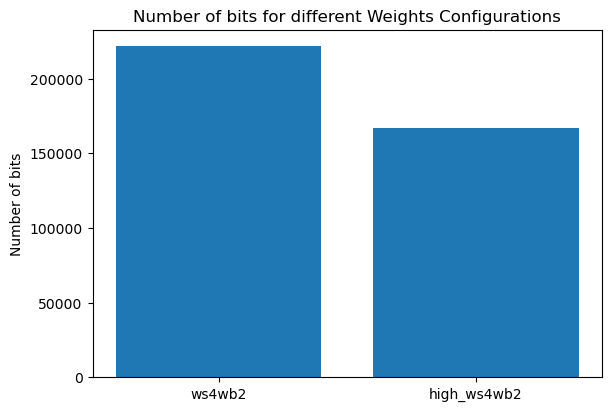

In [23]:
fig, ax = plt.subplots(layout='constrained', figsize=(6,4))
ax.bar(xticks, yticks)
ax.set_ylabel("Number of bits")
ax.set_title("Number of bits for different Weights Configurations")
fig.savefig('models_comparison/bits_number.png')

# Bars

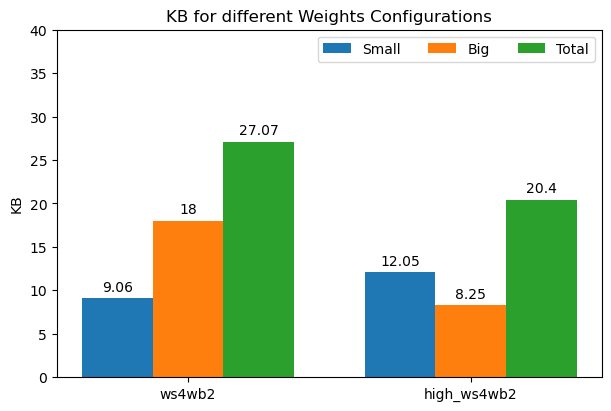

In [24]:
xticks = (model_name_1, model_name_2)
yticks = {
    'Small': np.round(np.array([model_bits_1['small'], 
                                model_bits_2['small']])/(8*1024), decimals=2),
    'Big': np.round(np.array([model_bits_1['big'], 
                              model_bits_2['big']])/(8*1024), decimals=2),
    'Total': np.round(np.array([model_bits_1['total'], 
                                model_bits_2['total']])/(8*1024), decimals=2),
}

x = np.arange(len(xticks))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

for k, v in yticks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('KB')
ax.set_title("KB for different Weights Configurations")
ax.set_xticks(x + width, xticks)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 40)
#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed')

fig.savefig('models_comparison/KB_total_small_big.png')
plt.show()

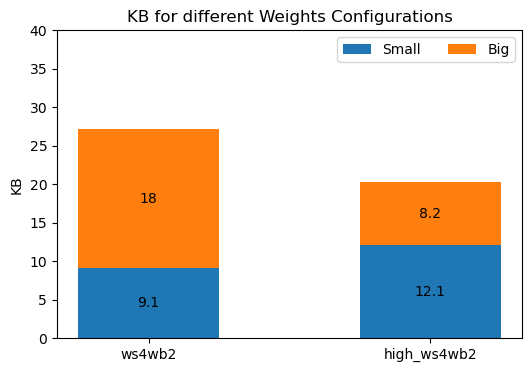

In [25]:
xticks = (model_name_1, model_name_2)
yticks = {
    'Small': np.round(np.array([model_bits_1['small'], model_bits_2['small']])/(8*1024), decimals=1),
    'Big': np.round(np.array([model_bits_1['big'], model_bits_2['big']])/(8*1024), decimals=1),
}

width = 0.5  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6,4))
bottom = np.zeros(2)

for k, v in yticks.items():
    p = ax.bar(xticks, v, width, label=k, bottom=bottom)
    bottom += v

    ax.bar_label(p, label_type='center')

ax.set_title('KB for different Weights Configurations')
ax.set_ylabel('KB')
ax.set_ylim(0, 40)
ax.legend(ncols=2)

fig.savefig('models_comparison/KB_small_big.png')
plt.show()

# Pies to view the impact of small, big and bias

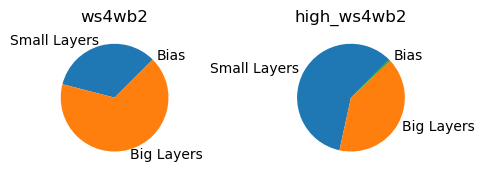

In [26]:
labels = ['Small Layers', 'Big Layers', 'Bias']

fig, ax = plt.subplots(1, 2, figsize=(5,5))

plt.subplot(1, 2, 1)
size = [model_bits_1['small'], model_bits_1['big'], model_bits_1['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_1)

plt.subplot(1, 2, 2)
size = [model_bits_2['small'], model_bits_2['big'], model_bits_2['bias']] 
plt.pie(size, labels = labels, startangle=45)
plt.title(model_name_2)

plt.tight_layout(pad=2)
fig.savefig('models_comparison/bits_pies.png')
plt.show()

# Weights Per Layer

In [27]:
weights_perlayer_fp32 = {key: model1[key]["weights"] for key in model1.keys()}
bits_perlayer_fp32 = {key: model1[key]["weights_bits"] for key in model1.keys()}

weights_perlayer_aimet = {key: model2[key]["weights"] for key in model2.keys()}
bits_perlayer_aimet = {key: model2[key]["weights_bits"] for key in model2.keys()}

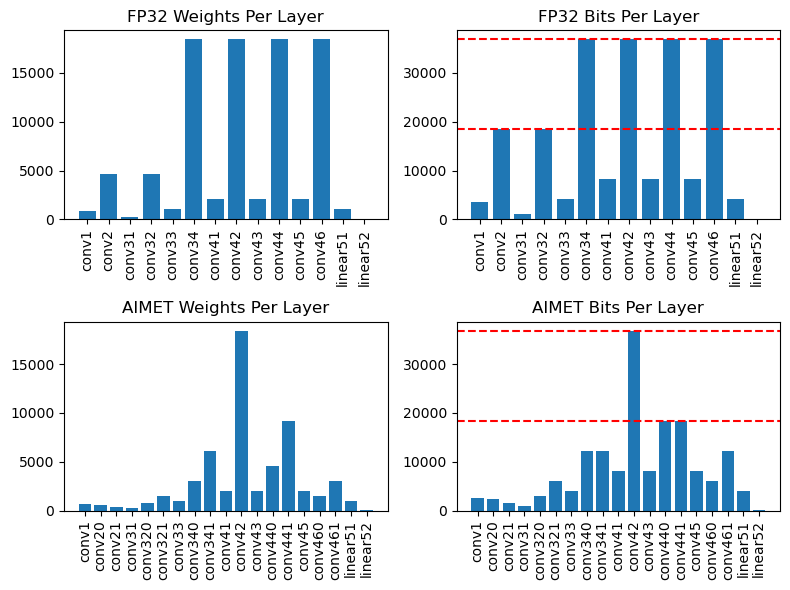

In [32]:
fp32_weights = list(weights_perlayer_fp32.values())
fp32_bits = list(bits_perlayer_fp32.values())
fp32_layers = list(weights_perlayer_fp32.keys())

aimet_weights = list(weights_perlayer_aimet.values())
aimet_bits = list(bits_perlayer_aimet.values())
aimet_layers = list(weights_perlayer_aimet.keys())

fig, ax = plt.subplots(2, 2, figsize=(8,6))

plt.subplot(2, 2, 1)
ax[0, 0].bar(fp32_layers, fp32_weights)
ax[0, 0].set_xticks(fp32_layers)
ax[0, 0].set_xticklabels(fp32_layers, rotation=90)
ax[0, 0].set_title("FP32 Weights Per Layer")

plt.subplot(2, 2, 2)
ax[0, 1].bar(fp32_layers, fp32_bits)
ax[0, 1].set_xticks(fp32_layers)
ax[0, 1].set_xticklabels(fp32_layers, rotation=90)
plt.axhline(y=18432, color='r', linestyle='--')
plt.axhline(y=36864, color='r', linestyle='--')
ax[0, 1].set_title("FP32 Bits Per Layer")

plt.subplot(2, 2, 3)
ax[1, 0].bar(aimet_layers, aimet_weights)
ax[1, 0].set_xticks(aimet_layers)
ax[1, 0].set_xticklabels(aimet_layers, rotation=90)
ax[1, 0].set_title("AIMET Weights Per Layer")

plt.subplot(2, 2, 4)
ax[1, 1].bar(aimet_layers, aimet_bits)
ax[1, 1].set_xticks(aimet_layers)
ax[1, 1].set_xticklabels(aimet_layers, rotation=90)
plt.axhline(y=18432, color='r', linestyle='--')
plt.axhline(y=36864, color='r', linestyle='--')
ax[1, 1].set_title("AIMET Bits Per Layer")

plt.tight_layout()
fig.savefig('models_comparison/bars.png')
plt.show()

In [33]:
bits_perlayer_fp32

{'conv1': 3456,
 'conv2': 18432,
 'conv31': 1024,
 'conv32': 18432,
 'conv33': 4096,
 'conv34': 36864,
 'conv41': 8192,
 'conv42': 36864,
 'conv43': 8192,
 'conv44': 36864,
 'conv45': 8192,
 'conv46': 36864,
 'linear51': 4096,
 'linear52': 128}

In [29]:
bits_perlayer_aimet

{'conv1': 2592,
 'conv20': 2304,
 'conv21': 1536,
 'conv31': 1024,
 'conv320': 3072,
 'conv321': 6144,
 'conv33': 4096,
 'conv340': 12288,
 'conv341': 12288,
 'conv41': 8192,
 'conv42': 36864,
 'conv43': 8192,
 'conv440': 18432,
 'conv441': 18432,
 'conv45': 8192,
 'conv460': 6144,
 'conv461': 12288,
 'linear51': 4096,
 'linear52': 128}